![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Metaheurísticas

## Simulated Annealing

### - Professor: Felipe Reis


---
### Informações Iniciais

O presente tutorial tem como objetivo estudar o algoritmo Simulated Annealing.

#### Referências

O tutorial abaixo foi inspirado nas seguintes links:

* LUKE, Sean. **Essentials of Metaheuristics (Second Edition).**. 2013. Lulu. Disponível em: https://cs.gmu.edu/~sean/book/metaheuristics/.

* LUZIA, L. F. and Rodrigues, M. C. **Estudo sobre as metaheurísticas**. 2009. Disponível em: https://www.ime.usp.br/~gold/cursos/2009/mac5758/LeandroMauricioHeuristica.pdf.

* ALVARENGA, Cesar William Alvarenga. **How to Implement Simulated Annealing Algorithm in Python**. 2020. Disponível em: https://medium.com/swlh/how-to-implement-simulated-annealing-algorithm-in-python-ab196c2f56a0

* BROWNLEE, Jason. **Simulated Annealing From Scratch in Python**. 2021. Disponível em: https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/

* CEYHAN, Cihan. **Simulated Annealing algorithm to solve Travelling Salesman Problem in Python**. 2018. Disponível em: https://github.com/chncyhn/simulated-annealing-tsp

### Importação de bibliotecas 

In [1]:
import numpy as np
import numpy.random as rd
import operator 
import matplotlib.pyplot as plt
import sys

In [2]:
def plot_funcao(interv, f_, titulo=''):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.rcParams["axes.labelsize"] = 14
    plt.rcParams["axes.titlesize"] = 24

    plt.plot(interv, f_(interv))

    plt.title(titulo)
    plt.grid(); 
    plt.show()

In [3]:
def plot_grafico(values, scores, mark='x'):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.plot(values, scores, mark)

    plt.rcParams["axes.titlesize"] = 24
    
    if(len(values) < 500):
        plt.grid()
        
    plt.show()

In [4]:
def plot_cities(x, y):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.plot(x, y, 'or', markersize=12)
    plt.rcParams["axes.titlesize"] = 24
    plt.show()

In [5]:
#Fonte: https://github.com/chncyhn/simulated-annealing-tsp

def plotTSP(paths, coords, num_iters=1):
    x = []; y = []
    for i in paths[0]:
        x.append(coords[i][0])
        y.append(coords[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(coords[j][0])
                yi.append(coords[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = a_scale, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    plt.show()

---
## Simulated Annealing

### Problema 1: Mínimo de uma função

O mínimo de uma função de segundo grau será obtido pelo algoritmo de Simulated Anneling.

In [6]:
def f_prb1(x):
    return -(x**2)

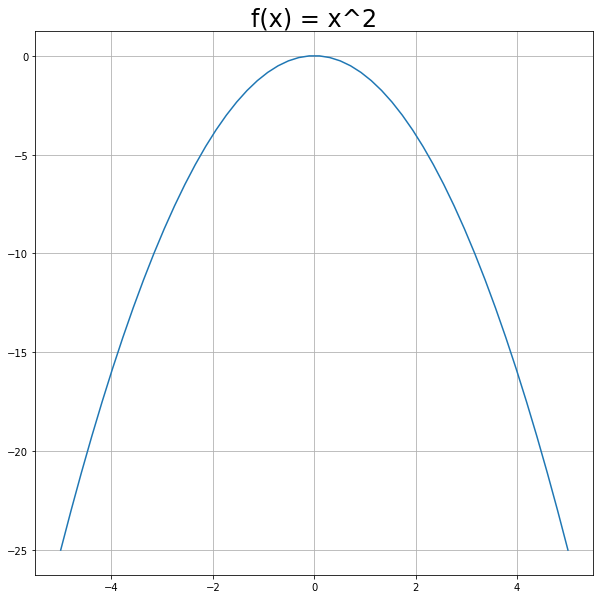

In [7]:
interv = np.linspace(-5,5)
plot_funcao(interv, f_=f_prb1, titulo='f(x) = x^2')

In [8]:
def basic_simul_annealing(f_qualidade, temp_ini, intervalo, iteracoes, step_size):        
    #define temperatura inicial
    temperatura = temp_ini
    
    #gera um valor aletório como primeira solução
    solution = rd.uniform(intervalo[0], intervalo[1])
    best_value = solution
    quali_best = f_qualidade(best_value)
    
    # run the simulated annealing
    for i in range(iteracoes):
        candidate = solution + (rd.uniform(-1, 1) * step_size)
        
        #calcula a qualidade das soluções
        quali_cand = f_qualidade(candidate)
        quali_solu = f_qualidade(solution)
        
        #verifica se a solução é melhor ou foi aceita pelo valor de temperatura
        if((quali_cand > quali_solu) or (rd.rand() < np.exp((quali_cand - quali_solu) / temperatura))):
            solution = candidate
        
        #reduz a temperatura, de forma linear
        temperatura -= 1
        if(temperatura == 0): temperatura = 0.00001
        
        # verifica se o ponto atual é melhor que o anterior
        if quali_solu > quali_best:
            best_value = solution
            quali_best = quali_solu
            
    return best_value, quali_best

In [9]:
np.random.seed(5)

#define a função de qualidade
def f_quali_prb1(x):
    return f_prb1(x)

# execução do simulated annealing
best, score = basic_simul_annealing(f_qualidade=f_quali_prb1, temp_ini = 100, 
                                    intervalo=[-5, 5], iteracoes=100, step_size=0.1)

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best, score))

Melhor resultado
f(-2.0837553408952436) = -4.178995


In [10]:
#save mode = 'none' (não salva valores), 'best' (somente melhores) e 'all' (todas as soluções)
def simulated_annealing(f_qualidade, f_temperatura, temp_ini, intervalo, iteracoes, step_size, save_mode='None'):        
    
    all_values, all_qualis = [], []
    
    #define temperatura inicial
    temperatura = temp_ini
    
    #gera um valor aletório como primeira solução
    solution = rd.uniform(intervalo[0], intervalo[1])
    best_value = solution
    quali_best = f_qualidade(best_value)
    
    if(save_mode.lower() != 'none'):
        all_values.append(best_value)
        all_qualis.append(quali_best)
    
    # run the simulated annealing
    for i in range(iteracoes):
        candidate = solution + (rd.uniform(-1, 1) * step_size)
        
        #calcula a qualidade das soluções
        quali_cand = f_qualidade(candidate)
        quali_solu = f_qualidade(solution)
        
        #verifica se a solução é melhor ou foi aceita pelo valor de temperatura
        if((quali_cand > quali_solu) or (rd.rand() < np.exp((quali_cand - quali_solu) / temperatura))):
            solution = candidate
        
        #reduz a temperatura, de forma linear
        temperatura = f_temperatura(temperatura)
        
        # verifica se o ponto atual é melhor que o anterior
        if quali_solu > quali_best:
            best_value = solution
            quali_best = quali_solu
            
            if(save_mode.lower() == 'best'):
                all_values.append(best_value)
                all_qualis.append(quali_best)
            
        if(save_mode.lower() == 'all'):
            all_values.append(solution)
            all_qualis.append(quali_solu)
            
    return best_value, quali_best, all_values, all_qualis

Imprime gráfico com esquema de resfriamento linear.

Melhor resultado
f(-2.0837553408952436) = -4.178995


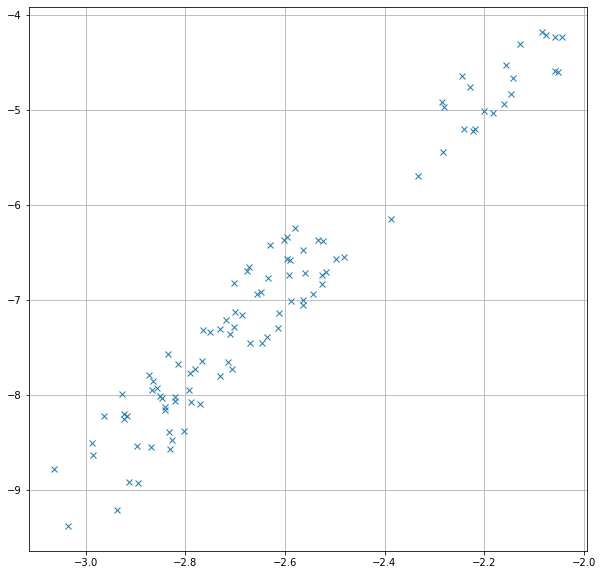

In [11]:
np.random.seed(5)

#define a função de temperatura
def f_temperatura_linear(x):
    if(x-1 == 0):
        return sys.float_info.epsilon
    return x - 1

# execução do simulated annealing
simul = simulated_annealing(f_qualidade=f_prb1, f_temperatura=f_temperatura_linear, 
                            temp_ini = 100, intervalo=[-5, 5], iteracoes=100, step_size=0.1, save_mode='all')

best_val, best_sco, values, scores = simul

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best_val, best_sco))

#imprime resultados
plot_grafico(values, scores)

Melhor resultado
f(0.037898942706692404) = -0.001436


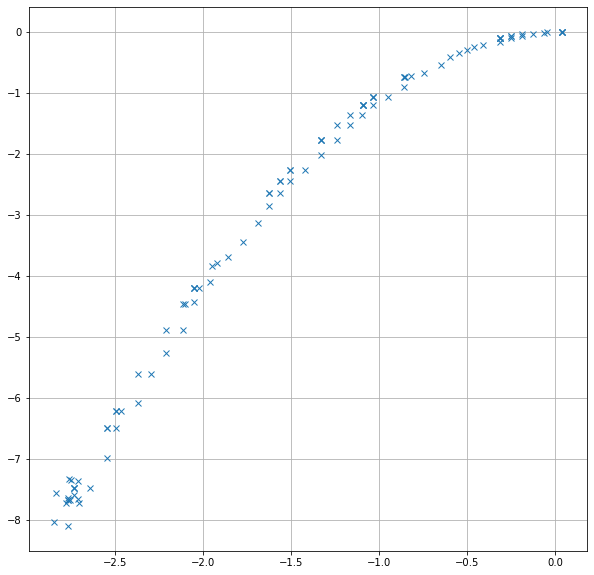

In [12]:
np.random.seed(5)

#define a função de temperatura
def f_temperatura_geom(x):
    if(x / 2 == 0):
        return sys.float_info.epsilon
    return x / 2

# execução do simulated annealing
simul = simulated_annealing(f_qualidade=f_prb1, f_temperatura=f_temperatura_geom, 
                            temp_ini = 100, intervalo=[-5, 5], iteracoes=100, step_size=0.1, save_mode='all')

best_val, best_sco, values, scores = simul

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best_val, best_sco))

#imprime resultados
plot_grafico(values, scores)

---
### Problema 2: Máximo de 4o grau

O máximo de uma função de segundo grau será obtido pelo algoritmo de Hill-Climbing.

In [13]:
def f_prb4(x):
    return -(x**4) + (4*(x**3)) + (5*(x**2)) + 3

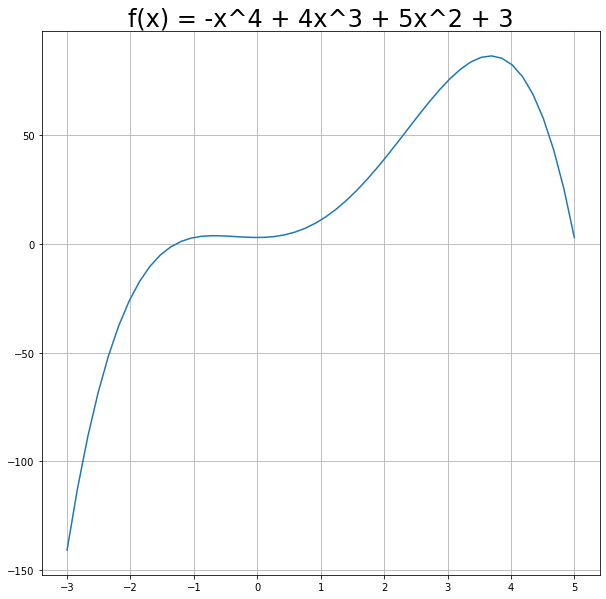

In [14]:
interv = np.linspace(-3,5)
plot_funcao(interv, f_=f_prb4, titulo='f(x) = -x^4 + 4x^3 + 5x^2 + 3')

Observe que para a solução da função de 4o grau usando Simulated Annealing, foi necessário alterar o parâmetro de passo (*step_size*), a função de redução de temperatura (deixando a redução mais lenta) e aumentar o número de iterações e a temperatura inicial.

Melhor resultado
f(3.6791374885624144) = 86.659537


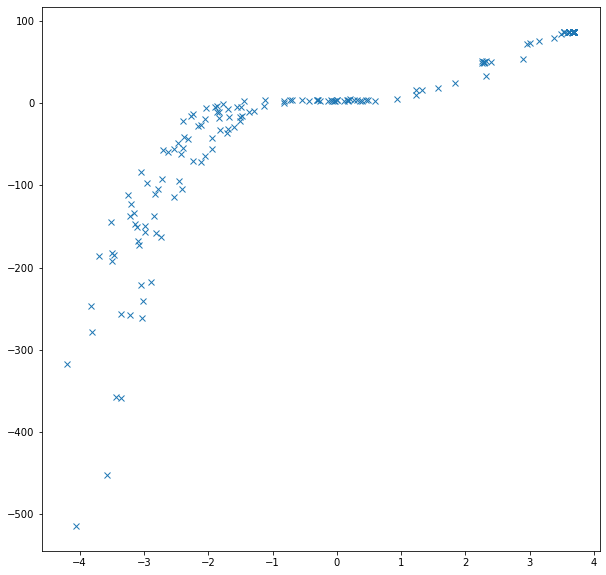

In [15]:
np.random.seed(5)

#define a função de temperatura
def f_temperatura_geom(x):
    if(x / 1.2 == 0):
        return sys.float_info.epsilon
    return x / 1.2

# execução do simulated annealing
simul = simulated_annealing(f_qualidade=f_prb4, f_temperatura=f_temperatura_geom, 
                            temp_ini = 10**10, intervalo=[-5, 5], iteracoes=1000, step_size=0.5, save_mode='all')

best_val, best_sco, values, scores = simul

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best_val, best_sco))

#imprime resultados
plot_grafico(values, scores)

---
### Problema 3: Zero de uma função

É possível utilizar a metaheurística Simulated Annealing para encontrar o zero de uma função.

In [16]:
def simulated_annealing_zero(f_qualidade, f_temperatura, temp_ini, intervalo, step_size, 
                             max_iteracoes, TOL=0.0001, save_mode='None'):
    
    all_values, all_qualis = [], []
    i=0
    
    #define temperatura inicial
    temperatura = temp_ini
    
    #gera um valor aletório como primeira solução
    solution = rd.uniform(intervalo[0], intervalo[1])
    best_value = solution
    quali_best = f_qualidade(best_value)
    
    if(save_mode.lower() != 'none'):
        all_values.append(best_value)
        all_qualis.append(quali_best)
    
    # run the simulated annealing
    while(np.abs(quali_best) >= TOL and i<max_iteracoes):
        
        candidate = solution + (rd.uniform(-1, 1) * step_size)
        
        #calcula a qualidade das soluções
        quali_cand = f_qualidade(candidate)
        quali_solu = f_qualidade(solution)
        
        #verifica se a solução é melhor ou foi aceita pelo valor de temperatura
        if((quali_cand > quali_solu) or (rd.rand() < np.exp((quali_cand - quali_solu) / temperatura))):
            solution = candidate
        
        #reduz a temperatura, de forma linear
        temperatura = f_temperatura(temperatura)
        
        # verifica se o ponto atual é melhor que o anterior
        if quali_solu > quali_best:
            best_value = solution
            quali_best = quali_solu
            
            if(save_mode.lower() == 'best'):
                all_values.append(best_value)
                all_qualis.append(quali_best)
            
        if(save_mode.lower() == 'all'):
            all_values.append(solution)
            all_qualis.append(quali_solu)
            
        i+=1
            
    return best_value, quali_best, all_values, all_qualis, i

Melhor resultado
f(-1.2877482209457305) = -0.000335
Iterations =  231


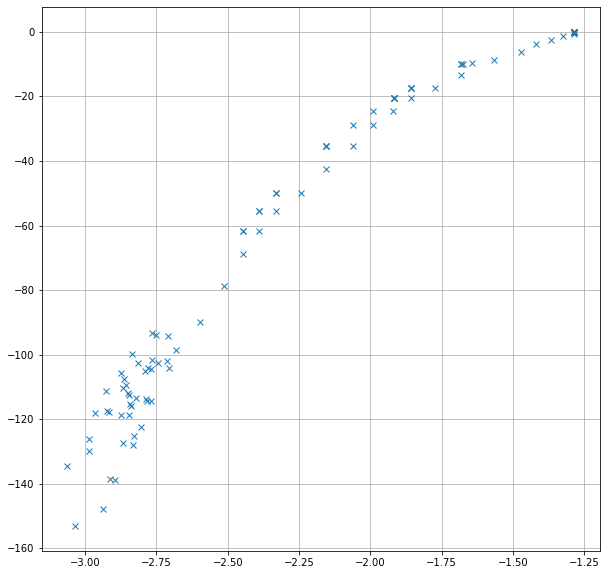

In [17]:
np.random.seed(5)

def f_quali_prb4(x):
    return -(np.abs(-(x**4) + (4*(x**3)) + (5*(x**2)) + 3))

#define a função de temperatura
def f_temperatura_geom(x):
    if(x / 1.2 == 0):
        return sys.float_info.epsilon
    return x / 1.2

# execução do simulated annealing
simul = simulated_annealing_zero(f_qualidade=f_quali_prb4, f_temperatura=f_temperatura_geom, 
                                 temp_ini=10000, intervalo=[-5, 5], step_size=0.1, 
                                 max_iteracoes=1000, TOL=0.001, save_mode='all')

best_val, best_sco, values, scores, iterat = simul

#imprime melhor resultado
print('Melhor resultado')
print('f(%s) = %f' % (best_val, best_sco))
print('Iterations = ', iterat)

#imprime resultados
plot_grafico(values, scores)

---
### Problema 4: Criptografia

É possível utilizar a metaheurística Simulated Annealing (SA) para advinhar chaves de criptografias.

Nesta seção, iremos utilizar o SA para desvendar a chave de criptografia de uma string do qual já sabemos seu significado.

O método de criptografia utiliza um dicionário, contendo letras e símbolos de pontuação.

In [18]:
np.random.seed(5)

def obter_alfabeto():
    #return "abceort "
    return "abcdefghijklmnopqrstuvwxyz.?, "
    
def obter_frase():
    #return "abacate e abobora"
    return "prof. felipe, qual o horario da aula?"
    #return "qual a cor do cavalo branco de napoleao?"
    #return "a maior gloria de viver nao esta em nunca cair, mas em nos levantar toda vez que caimos." #N. Mandela

def generate_cypher(alphabet):
    alfabeto = alphabet
    cripto_key = ""
    
    for k in alfabeto:
        index = np.random.randint(len(alfabeto))
        cripto_key += alfabeto[index]

        alfabeto = alfabeto[0:index] + alfabeto[index+1:] 

    return cripto_key

def cypher_phrase(alphabet, frase, key):
    encrypted = ""
    for c in frase:
        index = alphabet.index(c)
        encrypted += key[index]
    return encrypted

def decypher_phrase(alphabet, cripto_frase, key):
    return cypher_phrase(key, cripto_frase, alphabet)

def f_quali_cypher(encripted_str):
    referencia = obter_frase()
    quali = 0
    
    if(len(referencia) != len(encripted_str)):
        raise NameError('Tamanho da string criptografada é diferente da string de referência');
    
    for r, e in zip(referencia, encripted_str):
        quali += (0 if r == e else -1)
        
    return quali

def f_diff_string(value1, value2):
    if(len(value1) != len(value2)):
        raise NameError('Tamanho das strings é diferente');
        
    diff_str = ""
    for v1, v2 in zip(value1, value2):
        diff_str += "0" if v1 == v2 else "1"
        
    return diff_str

In [19]:
np.random.seed(5)

#gera chave de criptografia
cripto_key = generate_cypher(obter_alfabeto())

#gera string criptografada
cripto_string = cypher_phrase(obter_alfabeto(), obter_frase(), cripto_key)

#decripta string
decript_str = decypher_phrase(obter_alfabeto(), cripto_string, cripto_key)

#qualidade (qtd de erro)
quali = f_quali_cypher(cripto_string)

#imprime valores
print("Alfabeto original: \t", obter_alfabeto()) #chave de criptografia
print("Chave de cripto.: \t",cripto_key)         #chave de criptografia

print()
print("Frase original: \t", obter_frase())       #string original
print("Frase criptografada: \t", cripto_string)  #string criptografada
print("Frase decriptogr.: \t", decript_str)      #string decriptografada (original)

print()
print("Tamanho frase original: \t", len(obter_frase()))
print("Qualidade (cripto vs original):",quali)  #qtd de erro entre a string original e a string criptografada

Alfabeto original: 	 abcdefghijklmnopqrstuvwxyz.?, 
Chave de cripto.: 	 dprh.ulkfmz?nw bjsaeqxvigoyt,c

Frase original: 	 prof. felipe, qual o horario da aula?
Frase criptografada: 	 bs uycu.?fb.,cjqd?c ck sdsf chdcdq?dt
Frase decriptogr.: 	 prof. felipe, qual o horario da aula?

Tamanho frase original: 	 37
Qualidade (cripto vs original): -36


In [20]:
def f_gera_candidato(sol_atual):
    #gera números aleatorios
    i, j = np.random.randint(0, len(sol_atual), 2)
    
    #corrige sorteios de índices iguais
    if(i == j): 
        j = j+1 if j == 0 else j-1
    
    #ordena os valores
    i,j = min(i, j), max(i, j)
    
    #troca os valores
    x, y = sol_atual[i], sol_atual[j]
    candidate = sol_atual[:i] + y + sol_atual[i+1: j] + x + sol_atual[j+1:]
    
    if(len(candidate) != len(sol_atual)):
        print('Erro tamanho: ', i, j, sol_atual, candidate, x, y)
        raise NameError('Tamanho da string criptografada é diferente da string de referência')
    
    return candidate

def simulated_annealing_cripto(f_qualidade, cripto_frase, f_temperatura, temp_ini, max_iteracoes, 
                               save_mode='None', alphabet = "abcdefghijklmnopqrstuvwxyz.?, "):
    
    all_values, all_qualis = [], []
    i=0
    
    #define temperatura inicial
    temperatura = temp_ini
    
    #gera um valor aletório como primeira solução
    solution = generate_cypher(alphabet)
    
    #print('Solução inicial: ', solution)
    
    #define melhor solução
    best_value = solution
    quali_best = f_qualidade(decypher_phrase(alphabet, cripto_frase, best_value))
    
    if(save_mode.lower() != 'none'):
        all_values.append(best_value)
        all_qualis.append(quali_best)
    
    # run the simulated annealing
    while(quali_best < 0 and i<max_iteracoes):
        
        candidate = f_gera_candidato(solution)
        
        #calcula a qualidade das soluções
        quali_cand = f_qualidade(decypher_phrase(alphabet, cripto_frase, candidate))
        quali_solu = f_qualidade(decypher_phrase(alphabet, cripto_frase, solution))
        
        #verifica se a solução é melhor ou foi aceita pelo valor de temperatura
        if((quali_cand > quali_solu) or (rd.rand() < np.exp((quali_cand - quali_solu) / temperatura))):
            solution = candidate
        
        #reduz a temperatura, de forma linear
        temperatura = f_temperatura(temperatura)
        
        # verifica se o ponto atual é melhor que o anterior
        if quali_solu > quali_best:
            best_value = solution
            quali_best = quali_solu
            
            if(save_mode.lower() == 'best'):
                all_values.append(best_value)
                all_qualis.append(quali_best)
            
        if(save_mode.lower() == 'all'):
            all_values.append(solution)
            all_qualis.append(quali_solu)
            
        i+=1
        
    #print('Solução final: \t', best_value, '\n')
            
    return best_value, quali_best, all_values, all_qualis, i

In [21]:
np.random.seed(6)

#define a função de temperatura
def f_temperatura_geom(x):
    if(x / 1.1 == 0):
        return sys.float_info.epsilon
    return x / 1.1

cripto_key = generate_cypher(obter_alfabeto())
cripto_frase = cypher_phrase(obter_alfabeto(), obter_frase(), cripto_key)

# execução do simulated annealing
simul = simulated_annealing_cripto(f_qualidade=f_quali_cypher, cripto_frase=cripto_frase, 
                                   f_temperatura=f_temperatura_geom, temp_ini=10**10, 
                                   max_iteracoes=10**5, save_mode='all', alphabet=obter_alfabeto())

best_val, best_sco, values, scores, iterat = simul

print('Frase decriptografada:', decypher_phrase(obter_alfabeto(), cripto_frase, best_val))
print('Iteracoes: ', iterat)

Frase decriptografada: prof. felipe, qual o horario da aula?
Iteracoes:  2836


In [22]:
#imprime a string criptografada e decriptografada
print('Frase criptografada: \t', cripto_frase)
print('Frase original: \t', obter_frase())
print('Frase decriptografada: \t', decypher_phrase(obter_alfabeto(), cripto_frase, best_val))

Frase criptografada: 	  ezrqarnwy npahmkwazaozekeyzaxkakmwk,
Frase original: 	 prof. felipe, qual o horario da aula?
Frase decriptografada: 	 prof. felipe, qual o horario da aula?


In [23]:
#imprime as chaves 
print('Chave de cripto. original: \t', cripto_key)
print('Chave de criptografia SA: \t',best_val)
print('Diferença entre as chaves: \t', f_diff_string(cripto_key, best_val))

Chave de cripto. original: 	 kjdxnruoybsw?cz hetgmiv.lfq,pa
Chave de criptografia SA: 	 kdfxnruoyv?wtlz hejbmcsg.iq,pa
Diferença entre as chaves: 	 011000000110110000110111110000


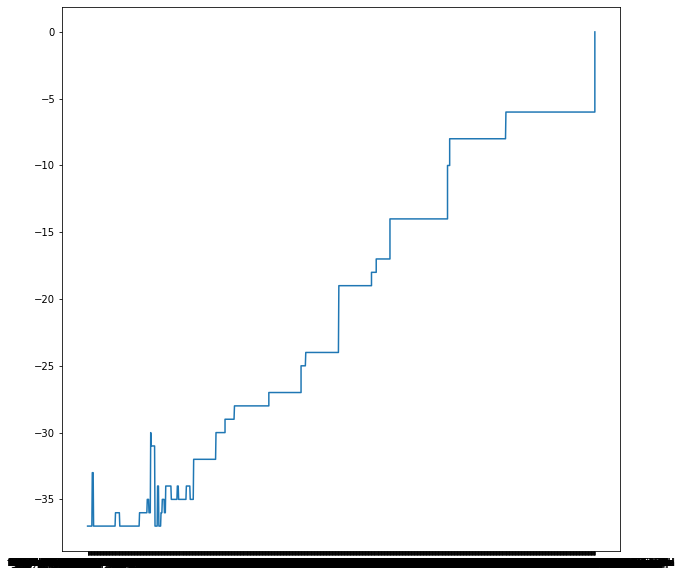

In [24]:
#imprime resultados
plot_grafico(values, scores, mark='-')

---
### Problema 5: Problema do Caixeiro Viajante (TSP)

É possível utilizar a metaheurística Simulated Annealing (SA) para resolver o Problema do Caixeiro Viajante (*Traveling Salesman Problem* - TSP)

Nesta seção, iremos utilizar o SA para solucionar o problema do caixeiro viajante, para um conjunto limitado de cidades / localidades.

Serão adotados os seguintes procedimentos:
- Serão definidos um conjunto de nós utilizando a posição geográfica *(x, y)*. 
- As distâncias entre duas cidades serão cálculadas com base na distância euclidiana entre os nós.
- A cidade de início (e fim) será gerada por sorteio (primeira cidade sorteada).

#### Métodos para gerar Coordenadas Geográficas e calcular a Distância Euclidiana

In [6]:
def f_generate_coords(num_nodes, interv=10, randint=False):
    if(not randint):
        return [[rd.uniform(-interv, interv), rd.uniform(-interv, interv)] for i in range(num_nodes)]
    else:
        return [[rd.randint(-interv, interv), rd.randint(-interv, interv)] for i in range(num_nodes)]

def f_calc_dist_euclidiana(x1, x2, y1, y2):
    return (((x1 - x2)**2) + ((y1 - y2)**2))**0.5

def f_calc_dist_eucl(coords):
    len_coords = len(coords)
    distances = np.zeros((len_coords, len_coords))
    
    for i in range(len_coords):
        for j in range(i+1, len_coords):
            x1, x2, y1, y2 = coords[i][0], coords[j][0], coords[i][1], coords[j][1]
            d = f_calc_dist_euclidiana(x1, x2, y1, y2)
            distances[i][j] = d
            distances[j][i] = d
        
    return distances

#### Busca Gulosa

Os métodos abaixo implementam a busca gulosa, para definir a solução inicial.

In [7]:
def f_obter_menor_valor(vetor, nodes):
    minimo, index = float("inf"), 0
        
    for i in nodes:
        if(vetor[i] < minimo and vetor[i] != 0.):
            minimo = vetor[i]
            index = i
            
    return minimo, index

def f_define_solucao_inicial(distances, return_vet_custos=False):
    path, custo = [], []
    curr = 0
    
    nodes = [i for i in range(0, len(distances))]
    nodes.append(0)
   
    for i in range(0, len(distances)):
        if(i != len(distances) -1):
            minimo, j = f_obter_menor_valor(distances[curr][:], nodes[:-1])
        else:
            minimo, j = f_obter_menor_valor(distances[curr][:], nodes)
        
        custo.append(minimo)
                
        path.append(curr)
        nodes.remove(curr)
        curr = j
        
    path.append(0)
    
    if(return_vet_custos):
        return path, custo
    
    return path, sum(custo)

#### Métodos para gerar candidato e calcular o custo da nova solução

In [8]:
def f_gera_candidato(sol_atual):
    candidate = sol_atual.copy()
    
    #gera números aleatorios
    i, j = np.random.randint(1, len(sol_atual)-1, 2)
    
    #corrige sorteios de índices iguais
    if(i == j): 
        j = j+1 if j == 1 else j-1
        
    #troca os valores
    x = candidate[j]
    candidate[j] = candidate[i]
    candidate[i] = x
    
    return candidate

def f_calcula_custo(distances, candidate):
    custo = 0
    curr = 0
          
    for j in candidate[1:]:
        custo += distances[curr][j]
        curr = j

    return custo

#### Estudo Inicial do Problema 

[[-2, -3], [-9, 8], [-2, 1], [3, -2], [4, -11]]


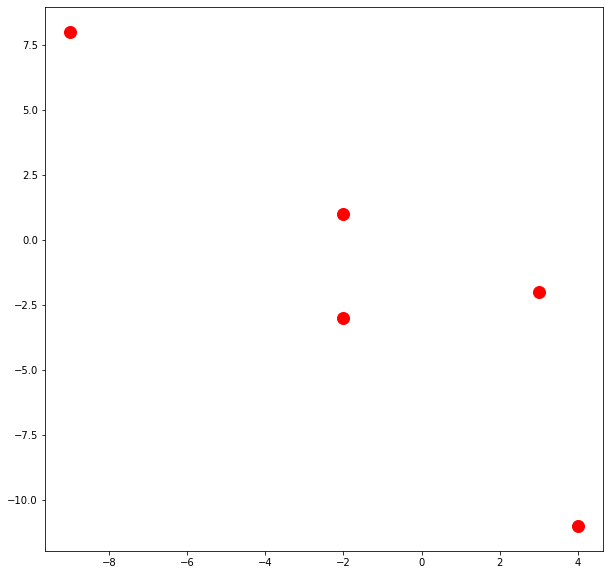

In [11]:
#gera coordenadas geográficas e plota as posições correspondentes às cidades

np.random.seed(6)
coords = f_generate_coords(5, interv=12, randint=True)

cities_x = list(map(lambda a: a[0], coords))
cities_y = list(map(lambda a: a[1], coords))

print(coords)
plot_cities(cities_x, cities_y)

In [12]:
#calcula as distâncias entre as cidades

distances = f_calc_dist_eucl(coords)

np.set_printoptions(precision=2)
print(distances)

[[ 0.   13.04  4.    5.1  10.  ]
 [13.04  0.    9.9  15.62 23.02]
 [ 4.    9.9   0.    5.83 13.42]
 [ 5.1  15.62  5.83  0.    9.06]
 [10.   23.02 13.42  9.06  0.  ]]


In [13]:
#gera resultado inicial (por busca gulosa) e imprime o custo

distances = f_calc_dist_eucl(coords)
print(distances)
print()

path, custo = f_define_solucao_inicial(distances, return_vet_custos=True)
print(path)
print(custo)
print(sum(custo))

[[ 0.   13.04  4.    5.1  10.  ]
 [13.04  0.    9.9  15.62 23.02]
 [ 4.    9.9   0.    5.83 13.42]
 [ 5.1  15.62  5.83  0.    9.06]
 [10.   23.02 13.42  9.06  0.  ]]

[0, 2, 3, 4, 1, 0]
[4.0, 5.830951894845301, 9.055385138137417, 23.021728866442675, 13.038404810405298]
54.94647070983069


In [15]:
#gera um candidato e avalia o custo da nova solução

candidato = f_gera_candidato(path)
custo_cand = f_calcula_custo(distances, candidato)

#imprime resultados
print('Caminho original:', path)
print('Custo original: ', sum(custo))
print()
print('Caminho candidato:', candidato)
print('Custo candidato:', custo_cand)

Caminho original: [0, 2, 3, 4, 1, 0]
Custo original:  54.94647070983069

Caminho candidato: [0, 2, 4, 3, 1, 0]
Custo candidato: 55.13069716535476


#### Implementa Simulated Annealing para o Problema do Caixeiro Viajante (TSP)

In [16]:
def simulated_annealing_tsp(distances, f_temperatura, temp_ini, temp_fim, max_iteracoes, 
                            save_mode='None', sol_inicial='greedy'):
    
    all_values, all_qualis = [], []
    i=0
        
    #define temperatura inicial
    temperatura = temp_ini
    
    #utiliza busca local para gerar primeira solução
    if(sol_inicial == 'greedy'):
        solution, custo_sol  = f_define_solucao_inicial(distances)
        
    else: #aleatoria
        solution = [i for i in range(0, len(coords))]
        solution.append(0)
        custo_sol  = f_calcula_custo(distances, solution)
    
    print('Custo inicial: ', custo_sol)
    
    #define melhor solução
    best_value = solution
    quali_best = custo_sol
    
    if(save_mode.lower() != 'none'):
        all_values.append(best_value)
        all_qualis.append(quali_best)
    
    # run the simulated annealing
    while(i<max_iteracoes and temperatura > temp_fim):
        
        candidate = f_gera_candidato(solution)
        
        #calcula a qualidade das soluções
        quali_cand = f_calcula_custo(distances, candidate)
        quali_solu = f_calcula_custo(distances, solution)
        
        #print(quali_cand)
        
        #verifica se a solução é melhor ou foi aceita pelo valor de temperatura
        if((quali_cand < quali_solu) or (rd.rand() < np.exp((quali_solu - quali_cand) / temperatura))):
            solution = candidate
        
        #reduz a temperatura, de forma linear
        temperatura = f_temperatura(temperatura)
        
        # verifica se o ponto atual é melhor que o anterior
        if quali_solu < quali_best:
            best_value = solution
            quali_best = quali_solu
            
            if(save_mode.lower() == 'best'):
                all_values.append(best_value)
                all_qualis.append(quali_best)
                
        if(save_mode.lower() == 'all'):
            all_values = None
            all_qualis.append(quali_best)
            
        i+=1
        
    print('Custo final: \t', quali_best, '\n')
            
    return best_value, quali_best, all_values, all_qualis, i

#### Teste do Simulated Annealing

In [28]:
np.random.seed(6)

#define a função de temperatura
def f_temperatura_geom(x):
    if(x / 1.1 == 0):
        return sys.float_info.epsilon
    return x / 1.1

#define as coordenadas iniciais
coords = f_generate_coords(100, interv=1000, randint=False)
distances = f_calc_dist_eucl(coords)

# execução do simulated annealing
simul = simulated_annealing_tsp(distances=distances, f_temperatura=f_temperatura_geom, 
                                temp_ini=10**2, temp_fim=0, max_iteracoes=10**4, 
                                save_mode='best', sol_inicial='greedy')

best_val, best_sco, values, scores, iterat = simul

Custo inicial:  20738.976930209585
Custo final: 	 18884.95646689358 



<ipython-input-16-45608a7858c1>:41: RuntimeWarning: overflow encountered in double_scalars
  if((quali_cand < quali_solu) or (rd.rand() < np.exp((quali_solu - quali_cand) / temperatura))):


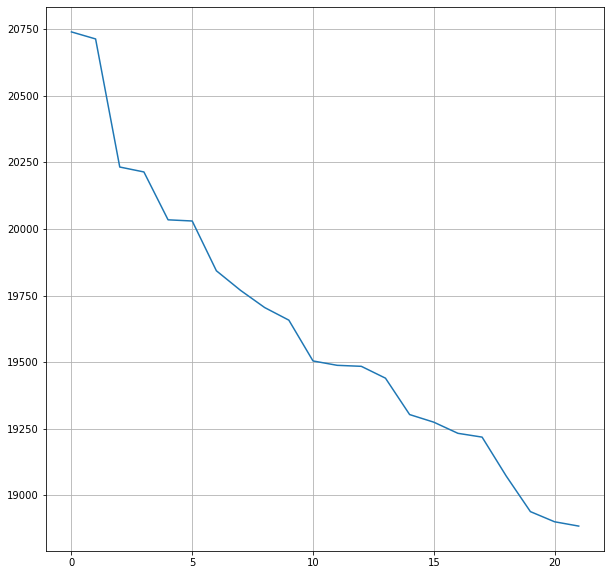

In [29]:
#imprime resultados
plot_grafico([i for i in range(0, len(scores))], scores, mark='-')

In [30]:
print(best_val)

[0, 18, 71, 37, 8, 67, 57, 12, 44, 32, 49, 42, 22, 3, 89, 6, 70, 5, 55, 17, 99, 20, 11, 34, 29, 48, 84, 74, 56, 9, 90, 30, 78, 15, 43, 7, 73, 21, 24, 33, 27, 52, 95, 53, 35, 38, 39, 2, 51, 61, 59, 75, 98, 63, 45, 10, 58, 13, 72, 97, 83, 69, 88, 16, 4, 87, 68, 46, 26, 19, 28, 65, 77, 14, 94, 96, 60, 54, 23, 1, 31, 86, 41, 50, 81, 25, 92, 82, 85, 40, 91, 66, 64, 93, 36, 79, 47, 76, 80, 62, 0]


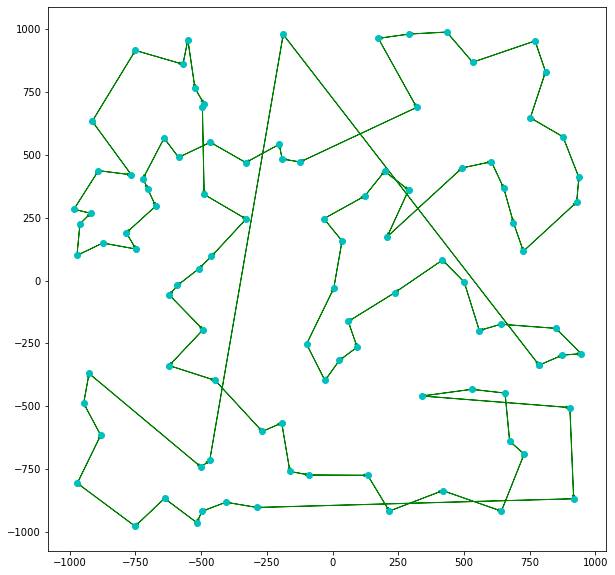

In [31]:
#solução inicial
plotTSP(paths=[values[0]], coords=coords)

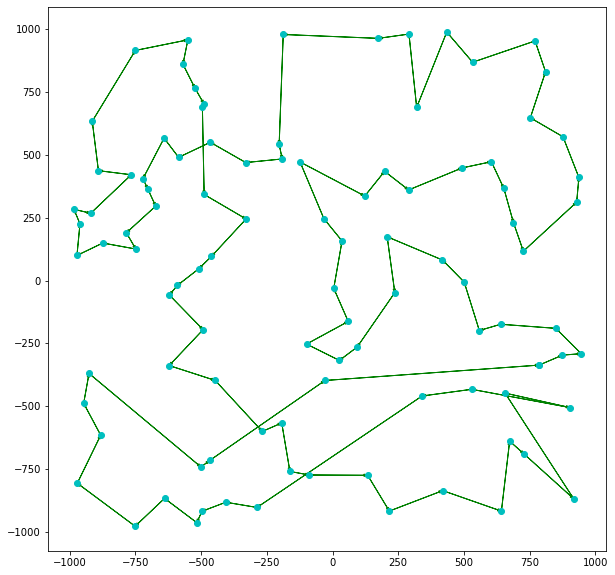

In [39]:
#solução final
plotTSP(paths=[best_val], coords=coords)

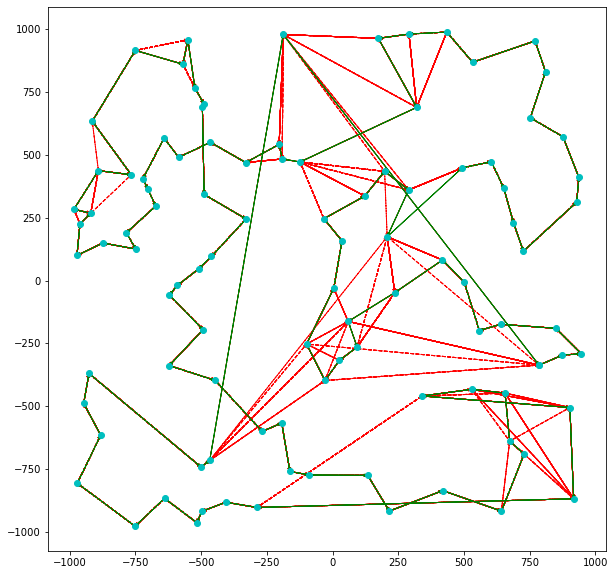

In [40]:
#imprime todas as modificações realizadas
paths = values[0:]
plotTSP(paths=paths, coords=coords, num_iters=len(paths))

---
### Problema 6: Problema do Caixeiro Viajante (TSP)

É possível utilizar a metaheurística Simulated Annealing (SA) para resolver o Problema do Caixeiro Viajante (*Traveling Salesman Problem* - TSP)

Nesta seção, iremos utilizar o SA para solucionar o problema do caixeiro viajante, para um conjunto limitado de cidades / localidades.

Para resolução do problema do caixeiro viajante, iremos utilizar o seguinte repositório MP-TESTDATA - The TSPLIB Symmetric Traveling Salesman Problem Instances, contendo arquivos para uso em problemas de Caixeiro Viajante. O acesso aos problemas pode ser feito pelo link:
* http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/

Dentre os arquivos contendo os repositórios, utilizaremos o arquivo "29 Cities in Bavaria (geographical distance)", que pode ser acessado diretamente pelo link: 
* http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/bayg29.tsp

Serão adotados os seguintes procedimentos:
- As distâncias entre duas cidades dadas pelo arquivo importado.
- A cidade de início (e fim) será a primeira cidade do arquivo.

#### Carrega o arquivo com as distâncias

In [39]:
#lê o arquivo com os dados
with open('bayg29.txt') as f:
    content = f.read().splitlines()

#gera matriz inicial
len_ct = len(content)+1
distances = np.zeros((len_ct, len_ct))

#preenche matriz (não simétrica)
for i in range(0, len_ct-1):
    distances[i][i+1:] = content[i].split(',')
    
#transforma a matriz inicial em matriz simétrica
for i in range(0, len(distances)):
    for j in range(i, len(distances)):
        distances[j,i] = distances[i,j]
        
#confere se a matriz é simétrica
print('Simétrica?', np.allclose(distances, distances.T))

#imprime a matriz
print()

Simétrica? True



In [41]:
np.random.seed(5)

# execução do simulated annealing
simul = simulated_annealing_tsp(distances=distances, f_temperatura=f_temperatura_geom, 
                                temp_ini=10**3, temp_fim=0, max_iteracoes=10**4, 
                                save_mode='all', sol_inicial='greedy')

best_val, best_sco, values, scores, iterat = simul

Custo inicial:  2005.0
Custo final: 	 1742.0 

10000


<ipython-input-16-45608a7858c1>:41: RuntimeWarning: overflow encountered in double_scalars
  if((quali_cand < quali_solu) or (rd.rand() < np.exp((quali_solu - quali_cand) / temperatura))):


In [42]:
print(best_val)
print(best_sco)

[0, 27, 5, 11, 8, 4, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 26, 7, 23, 15, 12, 28, 2, 25, 20, 0]
1742.0


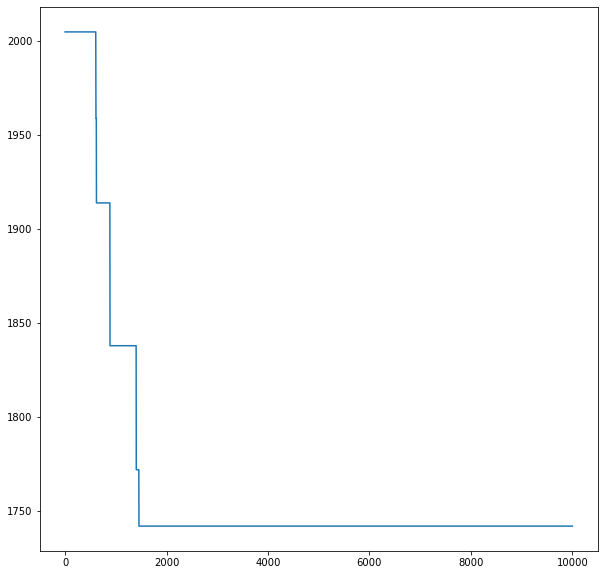

In [43]:
#imprime resultados
plot_grafico([i for i in range(0, len(scores))], scores, mark='-')